In [1]:
from colors_vqa_model import VQAEncoderDecoder
from colors_vqa_dataset import ColorsVqaDataSet
from colors_vqa_model import load_ckp
import torch
from torch.utils.data import DataLoader
import torchvision
import os
import matplotlib.pyplot as plt

cvqa = ColorsVqaDataSet("data", "colors.csv")

def build_optimizer( model, eta = 0.001, l2_strength = 0):
    return torch.optim.Adam(model.parameters(), 
                           lr = eta,
                           weight_decay =  l2_strength
                           )

def plot_images(images, normalize=True): 
    # normalise=True below shifts [-1,1] to [0,1]
    img_grid = torchvision.utils.make_grid(images, nrow=4, normalize=normalize)
    np_img = img_grid.numpy().transpose(1,2,0)  
    plt.imshow(np_img)

batch_size = 4
dataset_size = len(cvqa)
test_split = 0.7    
test_size = int(test_split * dataset_size)
train_size = dataset_size - test_size

train_dataset, test_dataset = torch.utils.data.random_split(cvqa,[train_size, test_size])
    
test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        collate_fn = cvqa.collate_fn,
        shuffle=False)

model = VQAEncoderDecoder(cvqa.get_vocab())
optimizer = build_optimizer(model)
checkpoint_dir = "./model"
checkpoint_fpath = os.path.join(checkpoint_dir, "checkpoint2.pt")
model, optimizer, start_epoch = load_ckp(checkpoint_fpath, model, optimizer)
batch_size = 1

test_iter = iter(test_loader)


[['<s>', 'the', 'one', 'that', 'is', 'the', 'same', '</s>'], ['<s>', 'the', 'one', 'that', 'is', 'more', 'green', '</s>'], ['<s>', 'green', '</s>'], ['<s>', 'yellow', '</s>']]


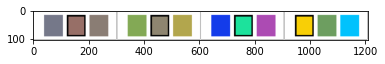

In [2]:
from colors_vqa_model import VQAEncoderDecoder
images, _, _, _,question_seq, question_len  = test_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'bright', 'pink', '</s>'], ['<s>', 'green', '</s>'], ['<s>', 'blue', '</s>'], ['<s>', 'pink', '</s>']]


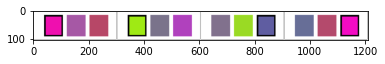

In [3]:
images, _, _, _,question_seq, question_len  = test_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'the', 'brighter', 'teal', '</s>'], ['<s>', 'pumpkins', '</s>'], ['<s>', 'purple', '</s>'], ['<s>', 'purple', '</s>']]


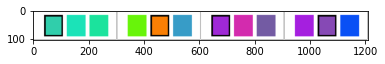

In [4]:
images, _, _, _,question_seq, question_len  = test_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'green', '</s>'], ['<s>', 'blue', '</s>'], ['<s>', 'red', '</s>'], ['<s>', 'red', '</s>']]


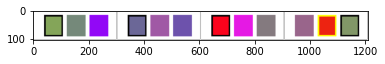

In [5]:
images, _, _, _,question_seq, question_len  = test_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

2031


/Users/mathewma/opt/anaconda3/envs/nlu/lib/python3.7/site-packages/torchvision/transforms/transforms.py:256: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


[['<s>', 'purple', 'not', 'the', 'pinks', '</s>']]


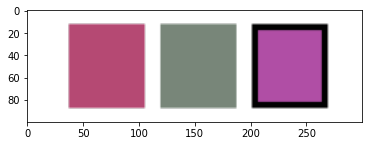

In [6]:
from colors import ColorsCorpusReader
from colors_vqa_test_dataset import ColorsVqaTestDataSet

COLORS_BAKEOFF_SRC_FILENAME = os.path.join(
"data",  "cs224u-colors-bakeoff-data.csv")

bakeoff_corpus = ColorsCorpusReader(COLORS_BAKEOFF_SRC_FILENAME)
bakeoff_rawcols, bakeoff_texts = zip(*[[ex.colors, ex.contents] for ex in bakeoff_corpus.read()])
print (len(bakeoff_rawcols))
questions = ["Describe the selected color"] * len(bakeoff_rawcols)
cvqTestData = model.build_dataset(bakeoff_rawcols, bakeoff_texts, questions)

cvqTestDataLoader = torch.utils.data.DataLoader(
                cvqTestData,
                batch_size=1,
                shuffle=False,
                pin_memory=True,
                collate_fn=cvqTestData.collate_fn)

bakeoff_iter = iter(cvqTestDataLoader)
images, _, _, _,question_seq, question_len  = bakeoff_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'gray', '</s>']]


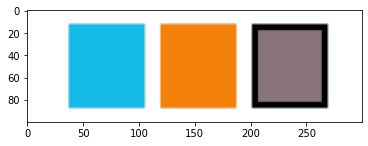

In [7]:
images, _, _, _,question_seq, question_len  = bakeoff_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'the', 'one', 'that', 'is', 'the', 'same', '</s>']]


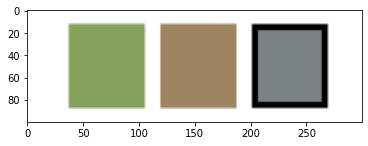

In [8]:
images, _, _, _,question_seq, question_len  = bakeoff_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'blue', '</s>']]


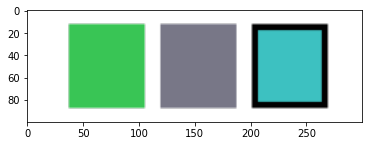

In [9]:
images, _, _, _,question_seq, question_len  = bakeoff_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'purple', '</s>']]


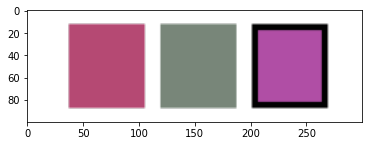

In [10]:
questions = ["Selected by Blue"] * len(bakeoff_rawcols)
cvqTestData = model.build_dataset(bakeoff_rawcols, bakeoff_texts, questions)

cvqTestDataLoader = torch.utils.data.DataLoader(
                cvqTestData,
                batch_size=1,
                shuffle=False,
                pin_memory=True,
                collate_fn=cvqTestData.collate_fn)

bakeoff_iter = iter(cvqTestDataLoader)
images, _, _, _,question_seq, question_len  = bakeoff_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)

[['<s>', 'gray', '</s>']]


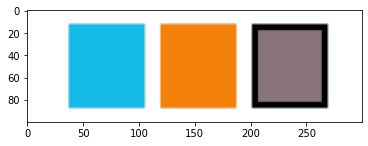

In [11]:
images, _, _, _,question_seq, question_len  = bakeoff_iter.next()
plot_images(images)
preds = model.predict(images,question_seq, question_len)
print(preds)